<a href="https://colab.research.google.com/github/simseoyoung/Deep-Learning/blob/main/CH.3/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Batch Normalization <br>
 : 학습 과정에서 각 배치 단위 별로 데이터가 다양한 분포를 가지더라도 각 배치별로 평균과 분산을 이용해 정규화하는 것



In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from tensorflow import keras

import random
import torch.utils.data as data_utils
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

cpu


[1] Data

In [3]:
mnist = keras.datasets.mnist
# MNIST 데이터셋 학습용(x,y), 테스트용(x,y)으로 나누기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# data 는 list 형식을 되어 있으므로 shape 을 보고, 이미지 visualization 을 하기 편한 array 형태로 바꾸어준다.

x_train=np.asarray(x_train)
y_train=np.asarray(y_train)
x_test=np.asarray(x_test)
y_test=np.asarray(y_test)

print("x_train 의 shape={}, y_train 의 shape={}".format(x_train.shape,y_train.shape))
print("x_test 의 shape={}, y_test 의 shape={}".format(x_test.shape,y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
x_train 의 shape=(60000, 28, 28), y_train 의 shape=(60000,)
x_test 의 shape=(10000, 28, 28), y_test 의 shape=(10000,)


In [4]:
batch_size = 1000
traindata = data_utils.TensorDataset(torch.FloatTensor(x_train), torch.FloatTensor(y_train))
trainloader = data_utils.DataLoader(traindata, batch_size = 1000, shuffle = True, drop_last = False)

[2] Model

In [5]:
class Batch_Norm(nn.Module):
  def __init__(self):
    super(Batch_Norm, self).__init__()

    self.network = nn.Sequential(nn.Linear(784,256),
                                     nn.BatchNorm1d(256),
                                     nn.ReLU(),
                                     nn.Linear(256,64),
                                     nn.BatchNorm1d(64),
                                     nn.ReLU(),
                                     nn.Linear(64,10))
  def forward(self, x):
      output = self.network(x)
        
      return output
    
model = Batch_Norm().to(device) 

In [6]:
epoch = 20
learning_rate = 0.01
weight_decay = 1e-5

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=weight_decay)

[3] Training

In [7]:
loss_list = []

for num_epoch in range(epoch):
    model.train()
    average_loss = 0

    for batch_idx, (image, label) in enumerate(trainloader):
        data_len = len(trainloader)

        x_Data = image.reshape(1000,784)
        
        optimizer.zero_grad()
        
        y_predict = model.forward(x_Data)
        
        y_label_long = torch.tensor(label, dtype=torch.long)
        y_label_long = y_label_long.to(device)
        
        loss = loss_function(y_predict, y_label_long)
        
        loss.backward()
        
        optimizer.step()
        
        loss_list.append(loss.detach().numpy())
        
        average_loss += (loss.item()/data_len)
        
    print("Epoch = {}\tAverage loss = {}".format((num_epoch+1), average_loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  app.launch_new_instance()


Epoch = 1	Average loss = 0.32770997534195595
Epoch = 2	Average loss = 0.0933742708216111
Epoch = 3	Average loss = 0.057550367340445524
Epoch = 4	Average loss = 0.03924326431006194
Epoch = 5	Average loss = 0.03057101052254439
Epoch = 6	Average loss = 0.024212357137973102
Epoch = 7	Average loss = 0.018694637009563548
Epoch = 8	Average loss = 0.01710708905011416
Epoch = 9	Average loss = 0.012627323344349862
Epoch = 10	Average loss = 0.011001143876152735
Epoch = 11	Average loss = 0.013389472903994226
Epoch = 12	Average loss = 0.013774764421395951
Epoch = 13	Average loss = 0.012189622743365663
Epoch = 14	Average loss = 0.010118118258348357
Epoch = 15	Average loss = 0.007554000293991216
Epoch = 16	Average loss = 0.009650536828363934
Epoch = 17	Average loss = 0.011647379510880755
Epoch = 18	Average loss = 0.009853098297026007
Epoch = 19	Average loss = 0.01227199592782806
Epoch = 20	Average loss = 0.009305773244705053


Text(0, 0.5, 'iterations')

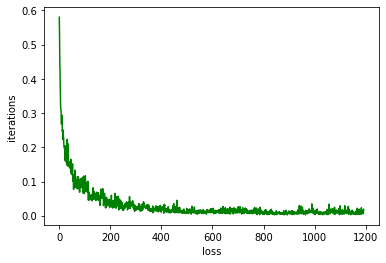

In [8]:
plt.plot(np.array(loss_list[7:]), 'g')
plt.xlabel('loss')
plt.ylabel('iterations')